# Part2

In [50]:
import sqlite3
import pandas as pd
import numpy as np
from IPython import display
con = sqlite3.connect("northwind.sqlite")

In [103]:
sql_northwind = """
SELECT name
FROM sqlite_schema
"""
cursor = con.cursor()
cursor.execute(sql_northwind)
print(cursor.fetchall())
cursor.close

[('Categories',), ('sqlite_sequence',), ('CustomerCustomerDemo',), ('sqlite_autoindex_CustomerCustomerDemo_1',), ('CustomerDemographics',), ('sqlite_autoindex_CustomerDemographics_1',), ('Customers',), ('sqlite_autoindex_Customers_1',), ('Employees',), ('EmployeeTerritories',), ('sqlite_autoindex_EmployeeTerritories_1',), ('Order Details',), ('sqlite_autoindex_Order Details_1',), ('Orders',), ('Products',), ('Regions',), ('Shippers',), ('Suppliers',), ('Territories',), ('sqlite_autoindex_Territories_1',), ('Alphabetical list of products',), ('Current Product List',), ('Customer and Suppliers by City',), ('Invoices',), ('Order Subtotals',), ('Orders Qry',), ('Product Sales for 1997',), ('Products Above Average Price',), ('Products by Category',), ('Quarterly Orders',), ('Sales Totals by Amount',), ('Summary of Sales by Quarter',), ('Summary of Sales by Year',), ('Category Sales for 1997',), ('Order Details Extended',), ('Sales by Category',)]


<function Cursor.close()>

* ***Some basic information provided by data base, evaluating the the whole work they have done in the past years***

**We want to know which region they much more concentrate on**

In [236]:
# We combine three table by using SQL query method
Draft1 = """
        SELECT T.TerritoryID, T.TerritoryDescription, T.RegionID, R.RegionDescription FROM Territories as T
        LEFT JOIN Regions as R ON T.RegionID = R.RegionID
       """
Draft1_1 = pd.read_sql(Draft1,con)
Draft1_2 = pd.merge(
    left = Draft1_1,
    right = pd.read_sql("SELECT * FROM EmployeeTerritories ",con),
    how = "left",
    on = "TerritoryID"
)
Draft1_2['RegionDescription'].value_counts()

Eastern                                                19
Westerns                                               15
Northern                                               11
Southern                                                8
Name: RegionDescription, dtype: int64

**The most active place for employee is Eastern and Northern compared to Western and Southern**

In [228]:
Draft2_1 = """
        SELECT O.OrderID, O.CustomerID, O.EmployeeID, E.LastName, E.FirstName, E.Title, E.City, E.Region FROM Orders as O
        LEFT JOIN Employees as E ON O.EmployeeID = E.EmployeeID
       """
Draft2_1 = pd.read_sql(Left,con)
Draft2_2 = pd.merge(
        left = Draft2_1,
        right = pd.read_sql("SELECT * FROM 'Summary of Sales by Year' ",con),
        how = "left",
        on = "OrderID"
        )
Draft2_3 = Draft2_2.drop(["OrderID"],axis = 1).groupby("EmployeeID").sum().sort_values(by = "Subtotal")
Draft2_3.insert(0, "EmployeeName", ['Buchanan,Steven','Suyama,Michael','Dodsworth,Anne','King,Robert','Callahan,Laura','Fuller,Andrew','Davolio,Nancy','Leverling,Janet','Peacock,Margaret'])
Draft2_3

,EmployeeName,Subtotal
EmployeeID,,
5,"Buchanan,Steven",68792.2825
6,"Suyama,Michael",72527.6295
9,"Dodsworth,Anne",76450.0665
7,"King,Robert",119619.2500
8,"Callahan,Laura",123842.6775
2,"Fuller,Andrew",162769.7800
1,"Davolio,Nancy",187277.3840
3,"Leverling,Janet",202812.8430
4,"Peacock,Margaret",225763.6960


In [231]:
print(sum(Draft2_3.Subtotal),Draft2_3.Subtotal.mean())

1239855.609 137761.73433333333


**In this section, I combine total sales of years table with the combination of orders table and Employee table to get a summary for each employees sales. According to the result table, we can see that the best salesman is Peacock Margaret and the worst salesman is Buchanan Steven. Besides, the total sale for 1996 and 1998 is 1239855 and mean of the sale is 137761**

In [124]:
Left = """
        SELECT O.OrderID, O.CustomerID, O.EmployeeID, E.LastName, E.FirstName, E.Title, E.City, E.Region FROM Orders as O
        LEFT JOIN Employees as E ON O.EmployeeID = E.EmployeeID
       """
Draft1 = pd.read_sql(Left,con)
Draft1

,OrderID,CustomerID,EmployeeID,LastName,FirstName,Title,City,Region
0,10248,VINET,5,Buchanan,Steven,Sales Manager,London,None
1,10249,TOMSP,6,Suyama,Michael,Sales Representative,London,None
2,10250,HANAR,4,Peacock,Margaret,Sales Representative,Redmond,WA
3,10251,VICTE,3,Leverling,Janet,Sales Representative,Kirkland,WA
4,10252,SUPRD,4,Peacock,Margaret,Sales Representative,Redmond,WA
...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,Fuller,Andrew,"Vice President, Sales",Tacoma,WA
826,11074,SIMOB,7,King,Robert,Sales Representative,London,None
827,11075,RICSU,8,Callahan,Laura,Inside Sales Coordinator,Seattle,WA
828,11076,BONAP,4,Peacock,Margaret,Sales Representative,Redmond,WA


In [14]:
ST = """
SELECT *
FROM "Sales Totals by Amount"
"""
ST1 = pd.read_sql(ST,con)
ST1

,SaleAmount,OrderID,CompanyName,ShippedDate
0,2556.950,10393,Save-a-lot Markets,1997-01-03 00:00:00.000
1,2505.600,10398,Save-a-lot Markets,1997-01-09 00:00:00.000
2,3063.000,10400,Eastern Connection,1997-01-16 00:00:00.000
3,3868.600,10401,Rattlesnake Canyon Grocery,1997-01-10 00:00:00.000
4,2713.500,10402,Ernst Handel,1997-01-10 00:00:00.000
...,...,...,...,...
59,2917.000,10760,Maison Dewey,1997-12-10 00:00:00.000
60,4337.000,10762,Folk och fÃ¤ HB,1997-12-09 00:00:00.000
61,3603.220,10772,Lehmanns Marktstand,1997-12-19 00:00:00.000
62,6635.275,10776,Ernst Handel,1997-12-18 00:00:00.000


# Part3

In [1]:
import os
import sys
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [2]:
pdf = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
psdf = ps.from_pandas(pdf)

In [4]:
Mean = []
Std = []
Name = []
for i in list(psdf.columns):
    if i in ['AQ1','AQ2','AQ3','AQ4','AFinal','HQ1','HQ2','HQ3','HQ4','HFinal']:
        Mean.append(psdf[i].mean())
        Std.append(psdf[i].std())
        Name.append(str(i))
    else:
        continue

In [5]:
Mean_psdf = pd.DataFrame(zip(Name,Mean,Std),columns = ["Variable","Mean","Std"])
Mean_psdf

,Variable,Mean,Std
0,AQ1,3.924806,4.490700
1,AQ2,6.241429,5.221593
2,AQ3,4.386920,4.632717
3,AQ4,5.890233,5.278775
4,AFinal,20.557188,10.195586
5,HQ1,4.828868,4.726903
6,HQ2,7.105157,5.702788
7,HQ3,4.791126,4.755145
8,HQ4,6.322962,5.417310
9,HFinal,23.174013,10.405952


In [6]:
meanps = psdf.groupby("season").mean()
meanps = meanps[['AQ1', 'AQ2', 'AQ3',
'AQ4', 'AFinal', 'HQ1', 'HQ2', 'HQ3', 'HQ4', 'HFinal']]
meanps

,AQ1,AQ2,AQ3,AQ4,AFinal,HQ1,HQ2,HQ3,HQ4,HFinal
season,,,,,,,,,,
2002,4.037453,6.022472,4.449438,5.928839,20.640449,4.307116,7.411985,4.715356,6.426966,23.018727
2003,3.558052,6.093633,3.913858,5.355805,19.112360,5.026217,6.625468,4.561798,6.295880,22.677903
2004,3.913858,6.265918,4.153558,5.797753,20.239700,4.943820,7.071161,4.250936,6.561798,22.906367
2005,3.887640,5.543071,4.029963,5.191011,18.786517,4.393258,7.426966,4.677903,5.737828,22.314607
2006,3.629213,6.179775,4.303371,6.063670,20.254682,4.606742,6.041199,4.565543,5.932584,21.258427
2007,3.696629,6.220974,4.337079,5.872659,20.228464,5.026217,7.074906,4.913858,6.018727,23.157303
2008,3.801498,6.498127,4.074906,6.423221,20.842697,5.179775,7.205993,4.595506,6.044944,23.183521
2009,3.868914,6.202247,4.299625,5.943820,20.382022,4.737828,7.790262,4.228464,5.887640,22.779026
2010,3.973783,6.865169,4.629213,5.704120,21.318352,4.576779,6.771536,4.868914,6.681648,23.000000


Text(0.5, 1.0, 'Mean of variables in each season')

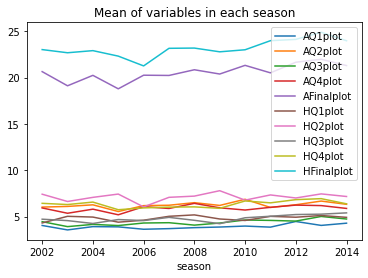

In [78]:
mean_data = pdf.groupby("season").agg(
AQ1plot = ("AQ1", np.mean),
AQ2plot = ("AQ2", np.mean),
AQ3plot = ("AQ3", np.mean),
AQ4plot = ("AQ4", np.mean),
AFinalplot = ("AFinal", np.mean),
HQ1plot = ("HQ1", np.mean),
HQ2plot = ("HQ2", np.mean),
HQ3plot = ("HQ3", np.mean),    
HQ4plot = ("HQ4", np.mean),    
HFinalplot = ("HFinal", np.mean),      
)
mean_data.plot.line()
plt.title("Mean of variables in each season")